In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
sns.set_style('white')
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
employees = pd.read_csv('employees.csv')

In [3]:
employees.head()

,id,person_name,nine_box_category,feedback,adjusted,reviewed
0,1,John Carter,"Category 1: 'Risk' (Low performance, Low poten...",John has not progressed in his position. He is...,False,True
1,2,John Carter,"Category 1: 'Risk' (Low performance, Low poten...",John has consistently disappointed me this qua...,False,True
2,3,John Carter,"Category 1: 'Risk' (Low performance, Low poten...",John turned in subpar work product all quarter...,False,True
3,6,John Carter,"Category 1: 'Risk' (Low performance, Low poten...",John Doe demonstrates a low level of knowledge...,False,True
4,7,George Gill,"Category 1: 'Risk' (Low performance, Low poten...",George gill's performance is really poor. He d...,False,True


In [4]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 878 non-null    int64 
 1   person_name        878 non-null    object
 2   nine_box_category  878 non-null    object
 3   feedback           878 non-null    object
 4   adjusted           878 non-null    bool  
 5   reviewed           878 non-null    bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 29.3+ KB


In [5]:
employees.describe()

,id
count,878.000000
mean,3235.269932
std,4956.401144
min,1.000000
25%,237.250000
50%,473.500000
75%,10019.750000
max,20222.000000


In [6]:
employees.sample(5)

,id,person_name,nine_box_category,feedback,adjusted,reviewed
177,151,Bailey Hunter,Category 2: 'Average performer' (Moderate perf...,Baily is an OK worker. Currently she doesn't r...,False,False
779,642,Graysen Sellers,"Category 9: 'Star' (High performance, High pot...",Graysen sellers is the best person in the whol...,False,False
172,146,Darius Stafford,Category 2: 'Average performer' (Moderate perf...,Darius is a good day to day task person. He la...,False,False
128,89,Alecia Keys,Category 2: 'Average performer' (Moderate perf...,Ms. Keys has a number of areas in which she co...,False,False
393,391,Kyle Lawson,Category 4: 'Inconsistent Player' (Low perform...,Kyle is working toward gaining proficiency. De...,True,True


## Exploratory Data Analysis

In [7]:
#nltk.download()

In [8]:
employees.columns

Index(['id', 'person_name', 'nine_box_category', 'feedback', 'adjusted',
       'reviewed'],
      dtype='object')

In [9]:
print('length of data is', len(employees))

length of data is 878


In [10]:
employees.shape

(878, 6)

In [11]:
employees.dtypes

id                    int64
person_name          object
nine_box_category    object
feedback             object
adjusted               bool
reviewed               bool
dtype: object

In [12]:
np.sum(employees.isnull().any(axis=1))

0

I'm going to use **groupby** to use describe by nine_box_category, this way we can get an overview of the data we are dealing with

In [13]:
employees.groupby('nine_box_category').describe()

id               \
                                                    count         mean   
nine_box_category                                                        
Category 1: 'Risk' (Low performance, Low potent...  126.0  4036.992063   
Category 2: 'Average performer' (Moderate perfo...  106.0  2874.547170   
Category 3: 'Solid Performer' (High performance...   89.0  2775.764045   
Category 4: 'Inconsistent Player' (Low performa...  113.0  2407.053097   
Category 5: 'Core Player' (Moderate performance...  112.0  2801.830357   
Category 6: 'High Performer' (High performance,...   91.0  3649.538462   
Category 7: 'Potential Gem' (Low performance, H...   41.0  4742.536585   
Category 8: 'High Potential' (Moderate performa...   88.0  2868.693182   
Category 9: 'Star' (High performance, High pote...  112.0  3708.589286   

                                                                        \
                                                            std    min   
nine_box_category                                                        
Category 1: 'Risk' (Low performance, Low potent...  6337.438549    1.0   
Category 2: 'Average performer' (Moderate perfo...  5237.138774   51.0   
Category 3: 'Solid Performer' (High performance...  4355.917182  177.0   
Category 4: 'Inconsistent Player' (Low performa...  4015.109358   73.0   
Category 5: 'Core Player' (Moderate performance...  4238.287976  106.0   
Category 6: 'High Performer' (High performance,...  5447.574688  217.0   
Category 7: 'Potential Gem' (Low performance, H...  4801.706546  534.0   
Category 8: 'High Potential' (Moderate performa...  4088.073732  495.0   
Category 9: 'Star' (High performance, High pote...  4995.451319  435.0   

                                                                             \
                                                       25%    50%       75%   
nine_box_category                                                             
Category 1: 'Risk' (Low performance, Low potent...   35.25   69.5  10046.75   
Category 2: 'Average performer' (Moderate perfo...  122.25  153.0    386.00   
Category 3: 'Solid Performer' (High performance...  201.00  235.0  10009.00   
Category 4: 'Inconsistent Player' (Low performa...  290.00  319.0    536.00   
Category 5: 'Core Player' (Moderate performance...  359.75  394.5   2975.00   
Category 6: 'High Performer' (High performance,...  440.50  467.0  10026.50   
Category 7: 'Potential Gem' (Low performance, H...  545.00  559.0  10073.00   
Category 8: 'High Potential' (Moderate performa...  583.75  608.5    633.25   
Category 9: 'Star' (High performance, High pote...  657.75  686.5  10042.25   

                                                             
                                                        max  
nine_box_category                                            
Category 1: 'Risk' (Low performance, Low potent...  20047.0  
Category 2: 'Average performer' (Moderate perfo...  20010.0  
Category 3: 'Solid Performer' (High performance...  10220.0  
Category 4: 'Inconsistent Player' (Low performa...  10221.0  
Category 5: 'Core Player' (Moderate performance...  10228.0  
Category 6: 'High Performer' (High performance,...  20222.0  
Category 7: 'Potential Gem' (Low performance, H...  10194.0  
Category 8: 'High Potential' (Moderate performa...  10227.0  
Category 9: 'Star' (High performance, High pote...  20024.0

Let's make a new column to detect how long the feedbacks are:

In [14]:
employees['length'] = employees['feedback'].apply(len)
employees.sample(5)

,id,person_name,nine_box_category,feedback,adjusted,reviewed,length
214,10088,Joyce Douglas,Category 2: 'Average performer' (Moderate perf...,"Joyce has been dependable this month, but not ...",False,False,309
391,337,Alfie Wright,Category 4: 'Inconsistent Player' (Low perform...,Alfie Wright is ranked Category 4. Coming into...,False,False,167
735,624,Dennis Buchanan,Category 8: 'High Potential' (Moderate perform...,Dennis Buchanan's performance has not reached ...,False,False,185
150,119,Michael Kaur,Category 2: 'Average performer' (Moderate perf...,He is very intelligent for our sharing busines...,False,False,109
23,27,Mackenzie Jennings,"Category 1: 'Risk' (Low performance, Low poten...",Mackenzie jennings works in category 1.\nAs sh...,False,True,212


### Data Visualization

Visualition of the length of the Feedback texts and their frequency

<AxesSubplot:ylabel='Frequency'>

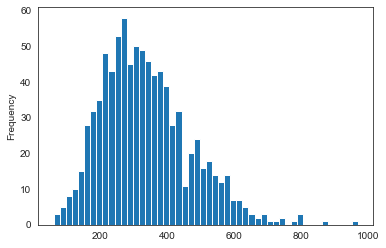

In [15]:
employees['length'].plot(bins=50, kind='hist') 

In [16]:
employees.length.describe()

count    878.000000
mean     335.930524
std      133.783240
min       61.000000
25%      238.250000
50%      317.000000
75%      408.750000
max      971.000000
Name: length, dtype: float64

In [17]:
employees[employees['length'] == 971]['feedback'].iloc[0]

"Ms. Amaya, I appreciate you taking the time to look over my feedback. During your time at this company, your work has been consistent. You have not done anything that is strikingly bad. However, you have yet to 'wow' any of the superiors with your work. Unfortunately this has led some to believe that your potential at this company is limited. If you hope to stay at this company and advance, I might advise you to try and put in a little extra effort. The bare minimum is a typically accepted standard, especially if the work is accurate and meets requirements. However, the bare minimum does not encourage others to see you as a 'good' worker or recognize you for your performance. While your work here has been satisfactory thus far and I have no complaints, I implore you to attempt to catch the interest of your superiors. This will benefit you in the long run at this company and hopefully invigorate your desire to be here. A little extra effort can go along way!"

This is longest feedback in our data , there a lot of fullstops , exclamation marks etc ... (to be revised)

I want to create a function that will classify the 9 categories that we have into 3 categories , negative or positive or neutral

In [18]:
employees["is_good_feedback"] = employees["nine_box_category"].apply(lambda x: 1 if x == "Category 9: 'Star' (High performance, High potential)" 
                                                                  or x=="Category 8: 'High Potential' (Moderate performance, High potential)" 
                                                                  or x=="Category 6: 'High Performer' (High performance, Moderate potential)"
                                                                  or x=="Category 3: 'Solid Performer' (High performance, Low potential)"
                                                                  or x=="Category 5: 'Core Player' (Moderate performance, Moderate potential)"
                                                                  else 0 )

In [19]:
employees.sample(30)

,id,person_name,nine_box_category,feedback,adjusted,reviewed,length,is_good_feedback
300,10012,Archie Dawson,Category 3: 'Solid Performer' (High performanc...,Archie has shown considerable improvements in ...,False,False,375,1
709,595,Bryleigh Stafford,Category 8: 'High Potential' (Moderate perform...,Bryleigh is the next CEO! Always striving to b...,False,False,236,1
345,286,Isobel Foster,Category 4: 'Inconsistent Player' (Low perform...,Isobel Foster has shown difficulty in completi...,False,False,249,0
587,463,Dallas Whitehead,Category 6: 'High Performer' (High performance...,Dallas Whitehead is very careful with his work...,False,False,160,1
499,406,Alex Watts,Category 5: 'Core Player' (Moderate performanc...,Alex is a stable and consistent working on the...,False,False,379,1
602,479,Natasha Richardson,Category 6: 'High Performer' (High performance...,Employee is able to overcome challenges while ...,False,False,423,1
420,10141,Lexi Rogers,Category 4: 'Inconsistent Player' (Low perform...,"Lexi seems to like being here, but is putting ...",False,True,321,0
545,515,Jaxson Giles,Category 5: 'Core Player' (Moderate performanc...,Jaxson Giles works very hard to understand the...,True,True,296,1
5,8,George Gill,"Category 1: 'Risk' (Low performance, Low poten...",George Gill has made frequent errors that are ...,False,True,163,0
273,230,Braydon Terrell,Category 3: 'Solid Performer' (High performanc...,Braydon Terell has earned the solid performer ...,False,False,556,1


1 : positive feedback , -1 : negative feedback , 0 ; neutral feedback

<AxesSubplot:xlabel='is_good_feedback', ylabel='nine_box_category'>

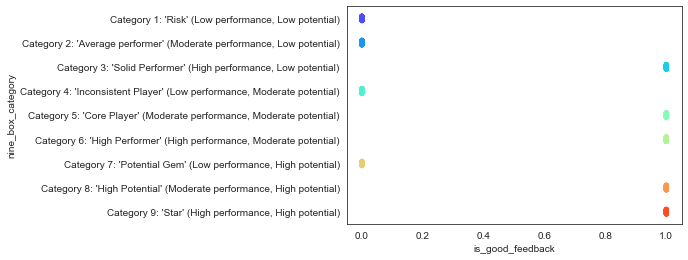

In [20]:
sns.stripplot(x='is_good_feedback',y='nine_box_category',data=employees,palette='rainbow')

So : Category 1 , Category 2, Category 4 are Negative feedbacks , Category 6,Category 8,Category 9 are Positive Feedbacks , and The rest Are Neutral

**Create a countplot of the number of occurrences for each type of feedback rating.**

<AxesSubplot:xlabel='is_good_feedback', ylabel='count'>

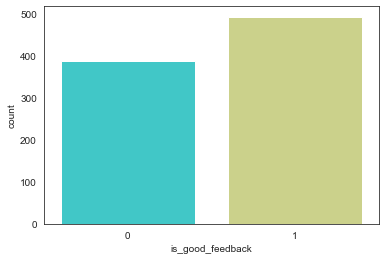

In [21]:
sns.countplot(x='is_good_feedback',data=employees,palette='rainbow')

Now I have an idea and an overview of our data , it looks like negative review the most occuring , but the numbers are close to each other

I'm going to classify the 3 categories of "is_bad_feedback" by length to see if feedback length is a distinguishing feature between the three of them:

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

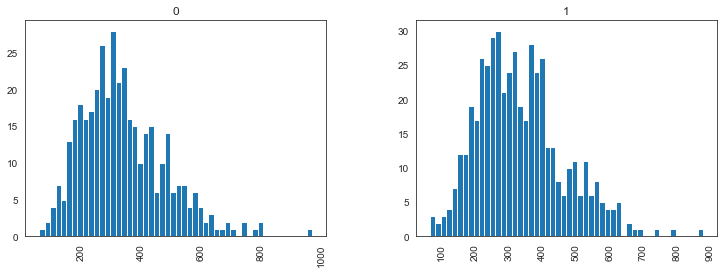

In [22]:
employees.hist(column='length', by='is_good_feedback', bins=50,figsize=(12,4))

## Text Pre-processing

Our main issue with our data is that it is all in text format (strings). The classification algorithms  will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.


In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

In [23]:
employees.sample(5)

,id,person_name,nine_box_category,feedback,adjusted,reviewed,length,is_good_feedback
304,10057,Jessica Dixon,Category 3: 'Solid Performer' (High performanc...,Jessica Dixon is a benefit to the team. What s...,False,False,213,1
89,10004,Freddie Davies,"Category 1: 'Risk' (Low performance, Low poten...",Freddie has been quite disappointing this quar...,False,False,449,0
596,473,Pedro David,Category 6: 'High Performer' (High performance...,Perdo David produces tasks efficiently and tim...,False,False,229,1
212,10053,Shannon Harvey,Category 2: 'Average performer' (Moderate perf...,Shannon Harvey's has given a mediocre performa...,False,False,266,0
873,10205,Bailey Hunt,"Category 9: 'Star' (High performance, High pot...",No one performs like Bailey. I believe she wil...,False,False,183,1


select only relevant columns

In [25]:
employees = employees[["feedback", "is_good_feedback"]]
employees.sample(10)

,feedback,is_good_feedback
519,Kieran Clarke has shown a consistent approach ...,1
575,I'm so glad that we have Chelsea as a member o...,1
254,I consider Matthew to be the true quarterback ...,1
823,I'm always impressed by every assignment that ...,1
90,"Freddie is a nice guy, but his performance and...",0
710,Bryleigh is an incredibly bright worker and ha...,1
682,Ability to outperform others. Eagerly accepts ...,1
358,"So far, I haven't been able to trust Lacey wit...",0
257,Leo is an absolutely necessary member to have ...,1
79,Amy John is a mediocre worker. She does not tr...,0


maybe delete later


If the user doesn't leave any negative feedback comment, this will appear as "No Negative" in our data. This is the same for the positive comments with the default value "No Positive". We have to remove those parts from our texts.

In [26]:
#remove 'No Negative' or 'No Positive' from text
employees["feedback"] = employees["feedback"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

C:\Users\fedib\AppData\Local\Temp/ipykernel_1632/1127244400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employees["feedback"] = employees["feedback"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))


Let's create a function that will process the string in the feedback column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

In [27]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
employees["feedback_clean"] = employees["feedback"].apply(lambda x: clean_text(x))

C:\Users\fedib\AppData\Local\Temp/ipykernel_1632/3749972361.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employees["feedback_clean"] = employees["feedback"].apply(lambda x: clean_text(x))




To clean textual data, i made a 'clean_text' function that performs several transformations:
- lower the text
- tokenize the text (split the text into words) and remove the punctuation
- remove useless words that contain numbers
- remove useless stop words like 'the', 'a' ,'this' etc.
- Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
- lemmatize the text: transform every word into their root form (e.g. jobs -> job, felt -> feel)


In [28]:
employees.sample(10)

,feedback,is_good_feedback,feedback_clean
554,Dallas Whitehead is a Category 6: High Perform...,1,dallas whitehead category high performer alway...
165,April Craft is your typical employee. She tend...,0,april craft typical employee tends job show ti...
530,Declan Houghton is a very consistent part of t...,1,declan houghton consistent part team task fini...
808,Gavyn has increased productivity substantially...,1,gavyn increase productivity substantially year...
634,Regan Rhodes has proven their work to be exemp...,1,regan rhodes proven work exemplary though grea...
86,Freddie Davies needs lots of improvement in hi...,0,freddie davy need lots improvement work able m...
683,Joe white is very hard worker. He is highly sk...,1,joe white hard worker highly skillful high pot...
120,Jude has potential but needs coaching in sever...,0,jude potential need coach several area quality...
622,Markus Mathews is a great worker. He has shown...,1,markus mathews great worker show complete task...
27,Kayden Hill has shown no improvement over the ...,0,kayden hill show improvement last quarter cont...


## Feature Engineering

I will first start by adding sentiment analysis features because we can guess that the feedbacks are highly linked to how the managers are feeling about their employeees performance and potential. I will use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into account the context of the sentences to determine the sentiment scores. For each text, Vader retuns 4 values:
- a neutrality score
- a positivity score
- a negativity score
- an overall score that summarizes the previous scores

I will integrate those 4 values as features in our dataset.


In [29]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
employees["sentiments"] = employees["feedback"].apply(lambda x: sid.polarity_scores(x))
employees = pd.concat([employees.drop(['sentiments'], axis=1), employees['sentiments'].apply(pd.Series)], axis=1)

C:\Users\fedib\AppData\Local\Temp/ipykernel_1632/2712571651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employees["sentiments"] = employees["feedback"].apply(lambda x: sid.polarity_scores(x))


In [30]:
employees.sample(20)

,feedback,is_good_feedback,feedback_clean,neg,neu,pos,compound
584,Noah Cooke has earned the high performer ratin...,1,noah cooke earn high performer rating evaluati...,0.040,0.908,0.052,0.2960
122,Cason Vargas is a software developer for our c...,0,cason vargas software developer customer servi...,0.079,0.884,0.037,-0.6057
541,Dean is a great member of the team. He accomp...,1,dean great member team accomplishes every task...,0.043,0.644,0.313,0.9552
127,Alecia has shown somewhat average results this...,0,alecia show somewhat average result quarter se...,0.042,0.815,0.143,0.6249
344,Isobel is capable of much more if she has the ...,0,isobel capable much motivation typically get l...,0.041,0.759,0.200,0.8720
135,"Bailey has always been an average worker, noti...",0,bailey always average worker noting average is...,0.000,1.000,0.000,0.0000
841,Blake Rodriguez has performed outstandingly th...,1,blake rodriguez perform outstandingly quarter ...,0.000,0.928,0.072,0.4767
664,Makenna had some issues getting started in our...,0,makenna issue get start department work produc...,0.049,0.760,0.191,0.8910
827,"Madison has shown leadership, initiative, and ...",1,madison show leadership initiative can-do spir...,0.019,0.706,0.274,0.9607
329,Carl thorn's performances are really low . He ...,0,carl thorn's performance really low pay attent...,0.052,0.761,0.187,0.5348


# Vectorization

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

- Count how many times does a word occur in each message (Known as term frequency)

- Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

- Normalize the vectors to unit length, to abstract from the original text length (L2 norm)


Next, I will add some simple metrics for every text:
- number of characters in the text (I already did this)
- number of words in the text



In [31]:
# add number of characters column
employees["nb_chars"] = employees["feedback"].apply(lambda x: len(x))

# add number of words column
employees["nb_words"] = employees["feedback"].apply(lambda x: len(x.split(" ")))

In [32]:
employees.sample(15)

,feedback,is_good_feedback,feedback_clean,neg,neu,pos,compound,nb_chars,nb_words
25,Broderick Hays has been a member of our team f...,0,broderick hay member team past year demonstrat...,0.155,0.795,0.050,-0.6124,266,47
660,"Dylan has not shown much potential, but he doe...",0,dylan show much potential seem light see worke...,0.037,0.899,0.064,0.5687,481,100
268,Nolan Jacobson has earned the solid performer ...,1,nolan jacobson earn solid performer rating eva...,0.090,0.764,0.146,0.6948,544,91
706,Noel is a strong employee who consistently pro...,1,noel strong employee consistently produce qual...,0.041,0.745,0.214,0.8885,419,70
684,"Joe is an absolute asset to this company, he d...",1,joe absolute asset company absolutely great jo...,0.000,0.791,0.209,0.9337,321,65
754,Clay Terry developed multiple company process ...,1,clay terry develop multiple company process im...,0.000,0.817,0.183,0.9382,521,76
7,Libby's work need serious improvement in all a...,0,libby's work need serious improvement area num...,0.113,0.756,0.131,0.2960,336,57
374,Jay frequently shows up late to the office and...,0,jay frequently show late office miss deadlines...,0.084,0.800,0.116,0.6222,502,88
83,Isobel Foster. What a player to have. Easily o...,0,isobel foster player easily one bad player eve...,0.060,0.836,0.104,0.5499,533,101
49,Caiden Pace has repeatedly showed a lack of mo...,0,caiden pace repeatedly show lack motivation dr...,0.120,0.782,0.098,-0.1729,412,71


So the next step consist in extracting vector representations for every review. The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks. What's interesting is that similar words will have similar representation vectors.

Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.

We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.


In [33]:
#pip install --upgrade gensim

In [34]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(employees["feedback_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = employees["feedback_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
employees = pd.concat([employees, doc2vec_df], axis=1)

In [35]:
employees.sample(20)

,feedback,is_good_feedback,feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
409,Your strategies used were not successful\nLitt...,0,strategy use successful\nlittle imagination cr...,0.092,0.838,0.070,-0.1866,184,27,0.372240,0.609422,0.496082,-0.653061,0.088872
195,Sonny's work so far has been somewhat solid. H...,0,sonny's work far somewhat solid show ability c...,0.023,0.758,0.219,0.8545,264,51,0.083251,0.227330,0.217674,-0.245857,0.094682
657,Right now Logan is a new worker who is not per...,0,right logan new worker perform well still lear...,0.136,0.702,0.162,0.5055,426,74,0.055781,0.269126,0.343815,-0.207960,0.093432
630,"Once again, Noah has proven his value on the t...",1,noah proven value team quarter contribution se...,0.042,0.730,0.228,0.8885,372,56,0.328452,0.541850,0.552625,-0.762903,0.122351
614,I am submitting to you my feedback for Cristia...,1,submit feedback cristian fleming cristian appe...,0.000,0.941,0.059,0.3818,359,65,0.276632,0.322971,0.433849,-0.543087,0.114563
521,Kieran Clarke is a good team player in our tea...,1,kieran clarke good team player teamhe performs...,0.000,0.833,0.167,0.7003,195,33,0.220254,0.363470,0.538147,-0.516544,-0.037632
98,I feel like Layla may have overpromised during...,0,feel like layla may overpromised interview oft...,0.000,0.839,0.161,0.7927,285,46,0.284517,0.657147,0.752212,-0.864887,0.045241
415,Peter seems like a laid back type of person. T...,0,peter seem like lay back type person company n...,0.036,0.767,0.197,0.8630,304,52,0.182695,0.330150,0.514342,-0.611104,-0.014573
768,Chelsea has earned a high performer rating. D...,1,chelsea earn high performer rating evaluation ...,0.000,0.887,0.113,0.7574,418,66,0.511787,0.721015,0.779149,-0.989334,0.229578
107,Katherine struggles to meet the minimum requir...,0,katherine struggle meet minimum requirement ro...,0.113,0.848,0.038,-0.7506,567,94,0.504197,0.740582,0.868418,-1.072244,0.018879


### TF-IDF

check the bootcamp one

TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

Finally we add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document.

But why not simply counting how many times each word appears in every document? The problem with this method is that it doesn't take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.

The TF-IDF metric solves this problem:
- TF computes the classic number of times the word appears in the text
- IDF computes the relative importance of this word which depends on how many texts the word can be found

We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.


In [36]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(employees["feedback_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = employees.index
employees = pd.concat([employees, tfidf_df], axis=1)

In [37]:
employees.sample(15)

,feedback,is_good_feedback,feedback_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_within,word_without,word_work,word_worker,word_workplace,word_would,word_write,word_year,word_yet,word_young
343,Dylan Baker cannot be counted on. Sometimes he...,0,dylan baker cannot count sometimes show someti...,0.000,0.955,0.045,0.1154,163,32,0.058461,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
41,wade shows no meaningful improvements and will...,0,wade show meaningful improvement willingness grow,0.158,0.360,0.482,0.5423,61,9,0.144015,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
691,Mr Harvey was achieving what he was assigned f...,1,mr harvey achieve assigned quarter assign chal...,0.000,0.932,0.068,0.4188,315,54,0.159835,...,0.000000,0.0,0.000000,0.000000,0.0,0.154676,0.0,0.000000,0.000000,0.0
406,Tom is a promising candidate but lacks focus. ...,0,tom promise candidate lack focus although tom ...,0.026,0.835,0.138,0.8910,491,85,0.443866,...,0.000000,0.0,0.052126,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
511,"Heidi's work habits has been dismal, but there...",1,heidi's work habit dismal great room improveme...,0.055,0.747,0.198,0.9549,582,95,0.414771,...,0.000000,0.0,0.183130,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
747,Moises is class A worker. She puts out pretty...,1,moises class worker put pretty good work avera...,0.000,0.701,0.299,0.9451,236,48,-0.012495,...,0.000000,0.0,0.103872,0.205915,0.0,0.000000,0.0,0.000000,0.000000,0.0
494,Joseph has been with the company for 5 years. ...,1,joseph company year great coach junior kind co...,0.057,0.758,0.185,0.8820,363,62,0.239366,...,0.000000,0.0,0.228052,0.150697,0.0,0.000000,0.0,0.217480,0.000000,0.0
189,Sara's work has been somewhat middling. She do...,0,sara's work somewhat middle good thing also la...,0.000,0.806,0.194,0.8641,252,44,0.287928,...,0.000000,0.0,0.178913,0.000000,0.0,0.185514,0.0,0.000000,0.000000,0.0
874,Thaddeus Burgess is a constant force within th...,1,thaddeus burgess constant force within team wo...,0.000,0.739,0.261,0.9136,231,44,0.175628,...,0.285526,0.0,0.110455,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
382,Dylan Baker is has the ability to be a stable ...,0,dylan baker ability stable team player however...,0.000,0.807,0.193,0.8860,323,58,0.190419,...,0.000000,0.0,0.051581,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [38]:
employees.shape

(878, 501)

## Exploratory data analysis (2)

in order to have a better understanding of our data, let's explore it again : 

In [39]:
# show is_bad_review distribution
employees["is_good_feedback"].value_counts(normalize = True)

1    0.560364
0    0.439636
Name: is_good_feedback, dtype: float64

Our dataset looks balanced , there are approximatly 39% negative feedbacks ,33% postive ones and 27% neutral . This information will be very useful for the modelling part.

WordCloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance , i'm going to create a wordcloud function

**Now let's print some wordclouds to have a glimpse at what kind of words apear in our reviews:**

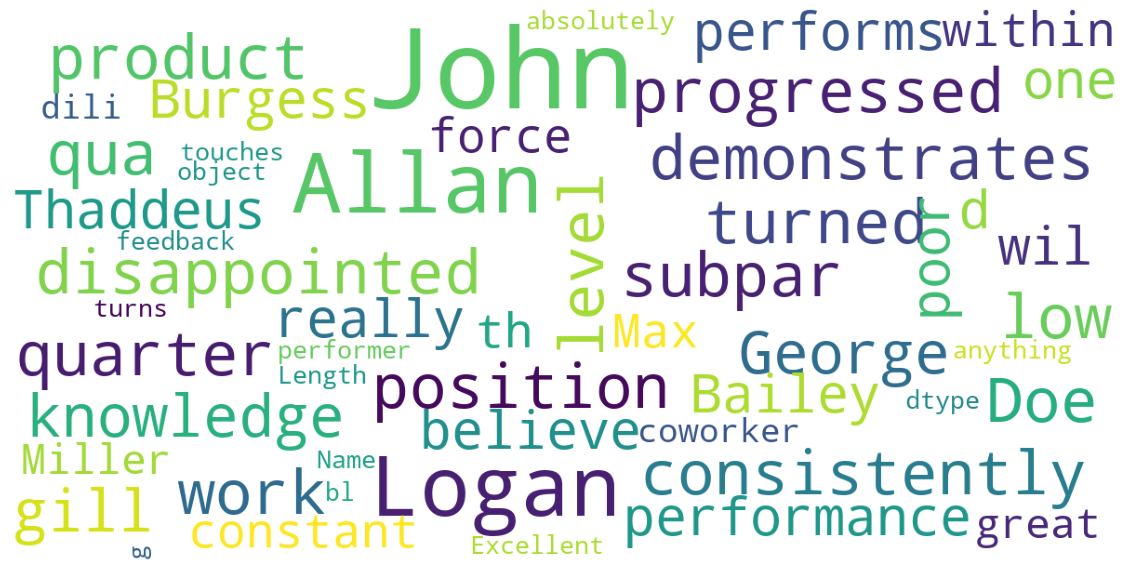

In [40]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(employees["feedback"])

**Interpretation** : Most of the words are indeed related to feedbacks and performance: performs, progressed, product,work,great,constant,feedback etc. Some other words reflect the 39% of negative feedbacks : disappointed, subpar, low etc. 

In [41]:
# highest positive sentiment reviews (with more than 5 words)
employees[employees["nb_words"] >= 5].sort_values("pos", ascending = False)[["feedback", "pos"]].head(10)

,feedback,pos
453,Generally of good speed.\nSightly enthusiast.\...,0.596
215,"Joyce douglas is a pleasure to have at work, s...",0.553
170,He is a good player.\nshould improve on speed....,0.512
286,Willingness to accomplish. Needs constant coac...,0.502
41,wade shows no meaningful improvements and will...,0.482
421,Lexi Rogers Is one of best workers. He is good...,0.475
190,Requires additional encouragement. Needs mento...,0.450
402,Alina Britt offer potential solutions to a pro...,0.417
819,Hey Nathan! You've been doing a great job late...,0.409
217,Teagan Pate Is getting better at performance. ...,0.407


Some errors can be found among the most postive reviews: Vader sometimes interpret 'no' or 'nothing' as negative words whereas they are sometimes used to say that there were no problems with the employer. Fortunately, most of the reviews are indeed good ones.

In [42]:
# lowest negative sentiment reviews (with more than 5 words)
employees[employees["nb_words"] >= 5].sort_values("neg", ascending = False)[["feedback", "neg"]].head(10)

,feedback,neg
88,You have poor potential to make value judgment...,0.277
54,Mr Geroge Gill struggles to get the task done....,0.231
483,Finley is an average worker with nothing extra...,0.218
106,Katherine has a bad attitude towards work and ...,0.213
402,Alina Britt offer potential solutions to a pro...,0.211
13,Libby started off well but no longer has motiv...,0.204
29,Kayden Hill struggles with the tasks set befor...,0.200
655,He has the ability to extract an idea about pa...,0.197
356,Lacey was very tough to deal with. She never s...,0.193
89,Freddie has been quite disappointing this quar...,0.190


The most negative reviews indeed correspond to some bad feedbacks.

# Training a Model

With feedbacks represented as vectors, we can finally train our model. Now we can actually use almost any sort of classification algorithms

**We first choose which features we want to use to train our model. Then we split our data into two parts:**
- one to train our model
- one to assess its performances


In [44]:
# feature selection
label = "is_good_feedback"
ignore_cols = [label, "feedback", "feedback_clean"]
features = [c for c in employees.columns if c not in ignore_cols]

**Split Our Data into a Train and Test Set**

In [45]:
# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(employees[features], employees[label], test_size = 0.20, random_state = 42)

**We will next use a Random Forest (RF) classifier for our predictions.**

In [46]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)



,feature,importance
3,compound,0.060163
0,neg,0.054162
2,pos,0.039376
287,word_need,0.018695
1,neu,0.017901
256,word_low,0.014856
193,word_great,0.014268
10,doc2vec_vector_4,0.013848
7,doc2vec_vector_1,0.013842
4,nb_chars,0.013312


**The most important features are indeed the ones that come from the previous sentiment analysis. The vector representations of the texts also have a lot of importance in our training. Some words appear to have a fairly good importance as well.**


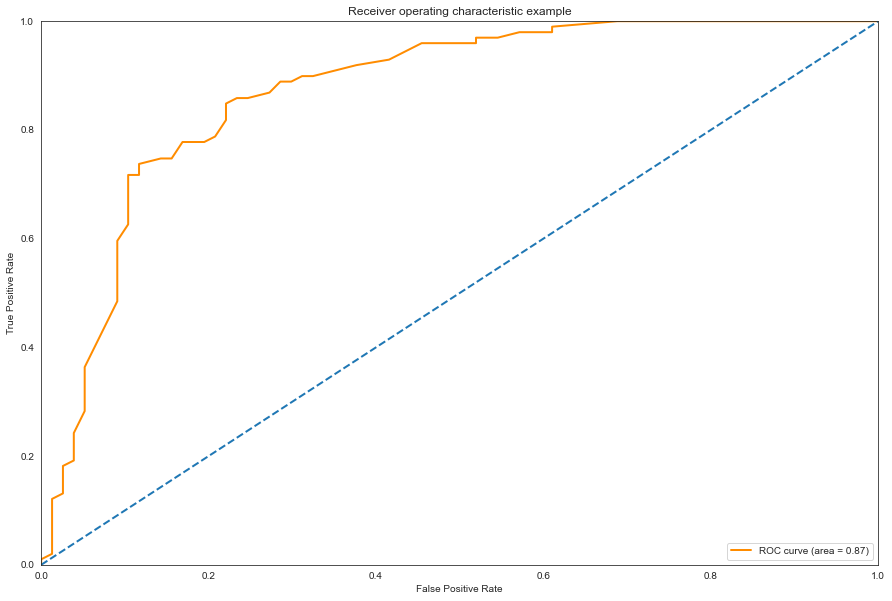

In [47]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [48]:
#pip install funcsigs

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.86')

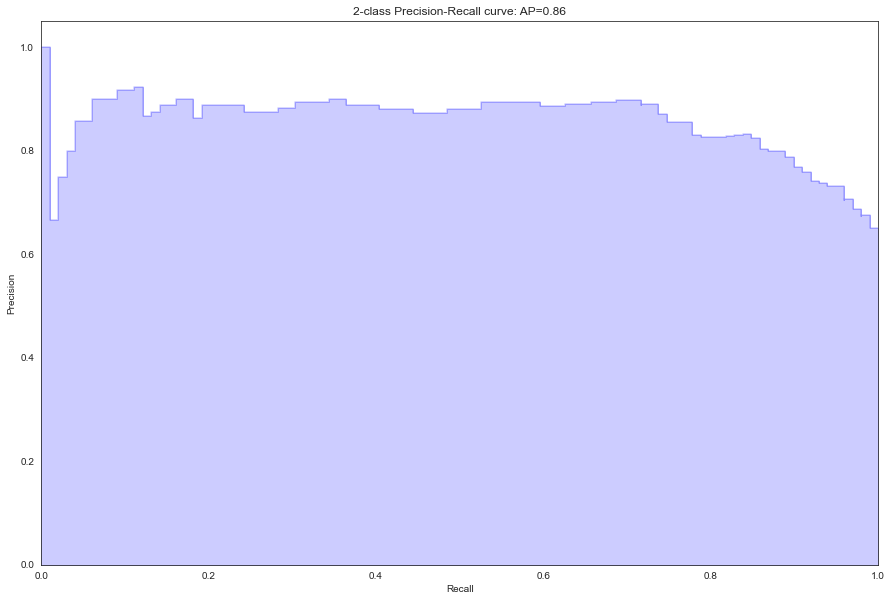

In [49]:
# PR curve

from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))